<a href="https://colab.research.google.com/github/vuong-viet-hung/Electrical-Component-Recognition/blob/main/PCA%20%2B%20SVM/Electronic_Component_Recognition_Using_PCA_%2B_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electronic Component Recognition Using PCA + SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Mandevices/Machine Learning/Electronic Component Recognition/'

/content/drive/MyDrive/Mandevices/Machine Learning/Electronic Component Recognition


In [ ]:
from pathlib import Path
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

%matplotlib inline

In [ ]:
DATASET_PATH = Path('Dataset/')
IMAGE_SIZE = (28, 28)
IMAGE_ARRAY_SIZE = 28 * 28 * 3
N_COMPONENTS = 150

## I. Prepare the dataset

### 1. Create arrays of images and corresponding labels

In [ ]:
num_classes = len([subdir for subdir in DATASET_PATH.iterdir()])
classes = range(num_classes)

In [ ]:
X = np.empty((0, IMAGE_ARRAY_SIZE))
y = np.empty(0)

In [ ]:
for subdir, current_label in zip(DATASET_PATH.iterdir(), classes):
    for image_path in subdir.iterdir():
        image = cv.imread(str(image_path))
        image = cv.resize(image, IMAGE_SIZE)
        image = np.ravel(image)
        image = np.expand_dims(image, axis=0)
        X = np.r_[X, image]
        y = np.r_[y, np.array([current_label])]

In [ ]:
print(f'Found {X.shape[0]} images belonging to {num_classes} classes.')

Found 11106 images belonging to 12 classes.


### 2. Mean normalizing images' feature

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 3. Split the dataset into train set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## II. Compute PCA on the image dataset

In [ ]:
pca = PCA(n_components=N_COMPONENTS).fit(X_train)

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## III. Train the SVM model

In [ ]:
param_grid = {
    'C': [1e0, 1e1, 1e2, 1e3, 1e4],
    'gamma': [1e0, 1e-1, 1e-2, 1e-3, 1e-4]
}

In [ ]:
clf = RandomizedSearchCV(
    SVC(kernel='rbf'), param_grid, n_iter=10
)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
clf.best_estimator_

SVC(C=10.0, gamma=0.001)

## IV. Evaluate the model

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1144
         1.0       1.00      1.00      1.00       106
         2.0       0.95      0.94      0.95        88
         3.0       1.00      1.00      1.00        96
         4.0       0.97      0.99      0.98       104
         5.0       0.97      0.98      0.98       100
         6.0       1.00      1.00      1.00        92
         7.0       1.00      0.98      0.99        95
         8.0       1.00      1.00      1.00        97
         9.0       0.99      1.00      0.99        78
        10.0       0.98      0.96      0.97       113
        11.0       1.00      1.00      1.00       109

    accuracy                           0.99      2222
   macro avg       0.99      0.99      0.99      2222
weighted avg       0.99      0.99      0.99      2222



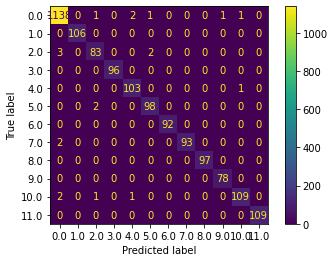

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test
)
plt.tight_layout
plt.show()